In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Google_Stock_Price_Train.csv', 'Google_Stock_Price_Test.csv']


In [2]:
#First approach to predict Stock prices.
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

params={'legend.fontsize':'x-large',
       'figure.figsize':(20,10),
       'axes.labelsize':'x-large',
       'axes.titlesize':'x-large',
       'xtick.labelsize':'x-large',
       'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [3]:
gs_df_train=pd.read_csv('../input/Google_Stock_Price_Train.csv')
print(gs_df_train.shape)
gs_df_train.head()

(1258, 6)


,Date,Open,High,Low,Close,Volume
0,26-Sep-17,936.69,944.08,935.12,937.43,1672749
1,25-Sep-17,939.45,939.75,924.51,934.28,1873375
2,22-Sep-17,942.77,950.00,940.84,943.26,1074806
3,21-Sep-17,948.13,952.80,939.38,947.55,1370685
4,20-Sep-17,937.73,950.00,937.50,947.54,2004018


In [4]:
#Normalization
training_set=gs_df_train.iloc[:,1:2].values
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_sc_set=sc.fit_transform(training_set)
training_sc_set

array([[0.89914537],
       [0.90319129],
       [0.90805811],
       ...,
       [0.07934972],
       [0.08360086],
       [0.07619802]])

In [5]:
#Split the training set (10 timestamps)
X_train=[]
y_train=[]
for i in range(10,1258):
    X_train.append(training_sc_set[i-10:i,0])
    y_train.append(training_sc_set[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)
print(X_train.shape,y_train.shape)


(1248, 10) (1248,)


In [6]:
#Reshape the X_train(model require format)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1248, 10, 1)

In [7]:
#LSTM model(Long Short Term Memory)
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout,Flatten
from keras import backend as k

Using TensorFlow backend.


In [8]:
model=Sequential()
model

In [9]:
model.add(LSTM(units=50,return_sequences=True,input_shape=(10,1)))
model.add(Dropout(0.2))
#model.add(LSTM(units=50,return_sequences=True))
#model.add(Dropout(0.2))
model.add(Flatten(data_format=None))
model.add(Dense(units=1))
model.compile(optimizer='RMSprop',loss='mean_squared_error')

model.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
1248/1248 [==============================] - 1s 953us/step - loss: 0.0159
Epoch 2/50
1248/1248 [==============================] - 0s 251us/step - loss: 0.0029
Epoch 3/50
1248/1248 [==============================] - 0s 248us/step - loss: 0.0026
Epoch 4/50
1248/1248 [==============================] - 0s 242us/step - loss: 0.0021
Epoch 5/50
1248/1248 [==============================] - 0s 256us/step - loss: 0.0021
Epoch 6/50
1248/1248 [==============================] - 0s 249us/step - loss: 0.0020
Epoch 7/50
1248/1248 [==============================] - 0s 251us/step - loss: 0.0020
Epoch 8/50
1248/1248 [==============================] - 0s 259us/step - loss: 0.0017
Epoch 9/50
1248/1248 [==============================] - 0s 258us/step - loss: 0.0017
Epoch 10/50
1248/1248 [==============================] - 0s 245us/step - loss: 0.0016
Epoch 11/50
1248/1248 [==============================] - 0s 243us/step - loss: 0.0017
Epoch 12/50
1248/1248 [==============================] - 0s 246

In [10]:
#Test dataset and testing the model
gs_df_test=pd.read_csv('../input/Google_Stock_Price_Test.csv')
print(gs_df_test.shape)
gs_df_test.head()

(21, 6)


,Date,Open,High,Low,Close,Volume
0,25-Oct-17,986.27,994.43,977.72,991.46,1395282
1,24-Oct-17,986.50,989.26,977.08,988.49,1445129
2,23-Oct-17,1005.18,1005.79,983.10,985.54,1639294
3,20-Oct-17,1007.05,1008.65,1002.27,1005.07,1606031
4,19-Oct-17,1004.75,1007.32,997.30,1001.84,1714243


In [11]:
real_gs_price=gs_df_test.iloc[:,1:2].values
real_gs_price


array([[ 986.27],
       [ 986.5 ],
       [1005.18],
       [1007.05],
       [1004.75],
       [1011.05],
       [1007.44],
       [1009.63],
       [1009.11],
       [1003.84],
       [ 989.04],
       [ 995.3 ],
       [ 995.  ],
       [ 980.  ],
       [ 972.79],
       [ 971.76],
       [ 967.56],
       [ 975.65],
       [ 966.  ],
       [ 956.25],
       [ 942.74]])

In [12]:
gs_df_total=pd.concat([gs_df_train['Open'],gs_df_test['Open']],axis=0)
print(gs_df_total.shape)
gs_df_total

(1279,)


0        936.69
1        939.45
2        942.77
3        948.13
4        937.73
5        933.41
6        935.01
7        940.09
8        946.00
9        945.50
10       946.92
11       947.20
12       949.70
13       944.25
14       943.87
15       946.86
16       957.47
17       946.30
18       935.67
19       919.95
20       931.88
21       939.21
22       943.71
23       937.00
24       926.96
25       925.77
26       926.98
27       942.95
28       941.25
29       941.03
         ...   
1249     380.88
1250     385.74
1251     381.76
1252     378.24
1253     382.98
1254     379.90
1255     377.45
1256     380.35
1257     375.30
0        986.27
1        986.50
2       1005.18
3       1007.05
4       1004.75
5       1011.05
6       1007.44
7       1009.63
8       1009.11
9       1003.84
10       989.04
11       995.30
12       995.00
13       980.00
14       972.79
15       971.76
16       967.56
17       975.65
18       966.00
19       956.25
20       942.74
Name: Open, Length: 1279

In [13]:
test_input=gs_df_total[len(gs_df_total)-len(gs_df_test)-10:].values
test_input

array([ 380.22,  380.88,  385.74,  381.76,  378.24,  382.98,  379.9 ,
        377.45,  380.35,  375.3 ,  986.27,  986.5 , 1005.18, 1007.05,
       1004.75, 1011.05, 1007.44, 1009.63, 1009.11, 1003.84,  989.04,
        995.3 ,  995.  ,  980.  ,  972.79,  971.76,  967.56,  975.65,
        966.  ,  956.25,  942.74])

In [14]:
test_input=test_input.reshape(-1,1)
print(test_input.shape)
test_input

(31, 1)


array([[ 380.22],
       [ 380.88],
       [ 385.74],
       [ 381.76],
       [ 378.24],
       [ 382.98],
       [ 379.9 ],
       [ 377.45],
       [ 380.35],
       [ 375.3 ],
       [ 986.27],
       [ 986.5 ],
       [1005.18],
       [1007.05],
       [1004.75],
       [1011.05],
       [1007.44],
       [1009.63],
       [1009.11],
       [1003.84],
       [ 989.04],
       [ 995.3 ],
       [ 995.  ],
       [ 980.  ],
       [ 972.79],
       [ 971.76],
       [ 967.56],
       [ 975.65],
       [ 966.  ],
       [ 956.25],
       [ 942.74]])

In [15]:
test_input=sc.transform(test_input)
print(test_input.shape)
test_input

(31, 1)


array([[0.08341029],
       [0.08437779],
       [0.09150212],
       [0.0856678 ],
       [0.08050779],
       [0.08745621],
       [0.0829412 ],
       [0.07934972],
       [0.08360086],
       [0.07619802],
       [0.9718252 ],
       [0.97216236],
       [0.99954557],
       [1.00228682],
       [0.99891523],
       [1.00815046],
       [1.00285853],
       [1.00606887],
       [1.0053066 ],
       [0.99758125],
       [0.97588578],
       [0.98506237],
       [0.9846226 ],
       [0.96263395],
       [0.95206473],
       [0.95055485],
       [0.94439802],
       [0.95625724],
       [0.9421112 ],
       [0.92781858],
       [0.90801413]])

In [16]:
X_test=[]
for i in range(10,31):
    X_test.append(test_input[i-10:i,0])

X_test=np.array(X_test)
print(X_test.shape)
X_test

(21, 10)


array([[0.08341029, 0.08437779, 0.09150212, 0.0856678 , 0.08050779,
        0.08745621, 0.0829412 , 0.07934972, 0.08360086, 0.07619802],
       [0.08437779, 0.09150212, 0.0856678 , 0.08050779, 0.08745621,
        0.0829412 , 0.07934972, 0.08360086, 0.07619802, 0.9718252 ],
       [0.09150212, 0.0856678 , 0.08050779, 0.08745621, 0.0829412 ,
        0.07934972, 0.08360086, 0.07619802, 0.9718252 , 0.97216236],
       [0.0856678 , 0.08050779, 0.08745621, 0.0829412 , 0.07934972,
        0.08360086, 0.07619802, 0.9718252 , 0.97216236, 0.99954557],
       [0.08050779, 0.08745621, 0.0829412 , 0.07934972, 0.08360086,
        0.07619802, 0.9718252 , 0.97216236, 0.99954557, 1.00228682],
       [0.08745621, 0.0829412 , 0.07934972, 0.08360086, 0.07619802,
        0.9718252 , 0.97216236, 0.99954557, 1.00228682, 0.99891523],
       [0.0829412 , 0.07934972, 0.08360086, 0.07619802, 0.9718252 ,
        0.97216236, 0.99954557, 1.00228682, 0.99891523, 1.00815046],
       [0.07934972, 0.08360086, 0.0761980

In [17]:
#Reshape the X_test(model require format)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
print(X_test.shape)
X_test

(21, 10, 1)


array([[[0.08341029],
        [0.08437779],
        [0.09150212],
        [0.0856678 ],
        [0.08050779],
        [0.08745621],
        [0.0829412 ],
        [0.07934972],
        [0.08360086],
        [0.07619802]],

       [[0.08437779],
        [0.09150212],
        [0.0856678 ],
        [0.08050779],
        [0.08745621],
        [0.0829412 ],
        [0.07934972],
        [0.08360086],
        [0.07619802],
        [0.9718252 ]],

       [[0.09150212],
        [0.0856678 ],
        [0.08050779],
        [0.08745621],
        [0.0829412 ],
        [0.07934972],
        [0.08360086],
        [0.07619802],
        [0.9718252 ],
        [0.97216236]],

       [[0.0856678 ],
        [0.08050779],
        [0.08745621],
        [0.0829412 ],
        [0.07934972],
        [0.08360086],
        [0.07619802],
        [0.9718252 ],
        [0.97216236],
        [0.99954557]],

       [[0.08050779],
        [0.08745621],
        [0.0829412 ],
        [0.07934972],
        [0.08360086],
  

In [18]:
#prediction of the google stock price
predicted_gs_price=model.predict(X_test)
predicted_gs_price

array([[0.07745296],
       [0.22173557],
       [0.3961944 ],
       [0.54920787],
       [0.6662048 ],
       [0.75005686],
       [0.81635606],
       [0.8484589 ],
       [0.88313544],
       [0.9325187 ],
       [0.9862648 ],
       [0.9828602 ],
       [0.98047054],
       [0.9779966 ],
       [0.97251904],
       [0.96530366],
       [0.95819485],
       [0.9522569 ],
       [0.94864595],
       [0.9437854 ],
       [0.937485  ]], dtype=float32)

In [19]:
#Inverse transformation
predicted_gs_price=sc.inverse_transform(predicted_gs_price)
predicted_gs_price

array([[376.15607],
       [474.58136],
       [593.5919 ],
       [697.9731 ],
       [777.785  ],
       [834.9863 ],
       [880.2136 ],
       [902.1132 ],
       [925.7685 ],
       [959.4563 ],
       [996.1203 ],
       [993.7978 ],
       [992.1676 ],
       [990.48   ],
       [986.74335],
       [981.8212 ],
       [976.9718 ],
       [972.92114],
       [970.4578 ],
       [967.14215],
       [962.8442 ]], dtype=float32)

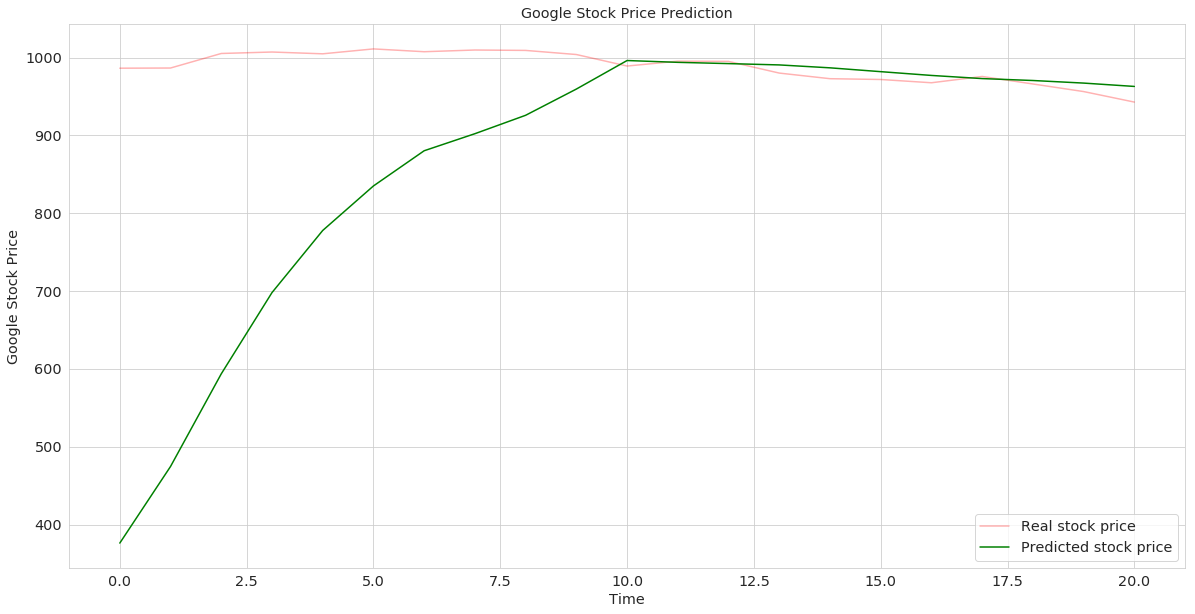

In [20]:
#plot the original and predicted google stock price
plt.plot(real_gs_price,color='r',alpha=0.3,label='Real stock price')
plt.plot(predicted_gs_price,color='g',label='Predicted stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [21]:
#Second approach to predict the stock prices
gs_training_set=gs_df_train.iloc[:,4:5].values
gs_training_set

array([[937.43],
       [934.28],
       [943.26],
       ...,
       [377.63],
       [378.63],
       [377.11]])

In [22]:
#Normalization
scaler=MinMaxScaler(feature_range=(0,1))
train_input=scaler.fit_transform(gs_training_set)
print(train_input.shape)
train_input

(1258, 1)


array([[0.90174464],
       [0.89711481],
       [0.91031351],
       ...,
       [0.07895704],
       [0.08042683],
       [0.07819275]])

In [23]:
#Split the train-test split
gs_X_train=[]
gs_y_train=[]
for i in range(10,1258):
    gs_X_train.append(train_input[i-10:i,0])
    gs_y_train.append(train_input[i,0])
gs_X_train,gs_y_train=np.array(gs_X_train),np.array(gs_y_train)
print(gs_X_train.shape,gs_y_train.shape)

(1248, 10) (1248,)


In [24]:
#Reshape the gs_X_train(model require format)
gs_X_train=np.reshape(gs_X_train,(gs_X_train.shape[0],gs_X_train.shape[1],1))
print(gs_X_train.shape)
gs_X_train


(1248, 10, 1)


array([[[0.90174464],
        [0.89711481],
        [0.91031351],
        ...,
        [0.89859929],
        [0.90571307],
        [0.92086659]],

       [[0.89711481],
        [0.91031351],
        [0.9166189 ],
        ...,
        [0.90571307],
        [0.92086659],
        [0.91529609]],

       [[0.91031351],
        [0.9166189 ],
        [0.9166042 ],
        ...,
        [0.92086659],
        [0.91529609],
        [0.9103576 ]],

       ...,

       [[0.07178447],
        [0.07673766],
        [0.07163749],
        ...,
        [0.08483619],
        [0.08077958],
        [0.08430707]],

       [[0.07673766],
        [0.07163749],
        [0.07129944],
        ...,
        [0.08077958],
        [0.08430707],
        [0.07895704]],

       [[0.07163749],
        [0.07129944],
        [0.08141158],
        ...,
        [0.08430707],
        [0.07895704],
        [0.08042683]]])

In [25]:
#LSTM model
regressor=Sequential()
regressor

In [26]:
regressor.add(LSTM(units=100,return_sequences=True,input_shape=(10,1)))
regressor.add(Dropout(0.2))
#regressor.add(LSTM(units=100,return_sequences=True))
#regressor.add(Dropout(0.2))
regressor.add(Flatten(data_format=None))
regressor.add(Dense(units=1))
regressor.compile(optimizer="RMSprop",loss='mean_squared_error')

regressor.fit(gs_X_train,gs_y_train,epochs=50,batch_size=32)

Epoch 1/50
1248/1248 [==============================] - 1s 927us/step - loss: 0.0184
Epoch 2/50
1248/1248 [==============================] - 0s 306us/step - loss: 0.0037
Epoch 3/50
1248/1248 [==============================] - 0s 298us/step - loss: 0.0028
Epoch 4/50
1248/1248 [==============================] - 0s 297us/step - loss: 0.0025
Epoch 5/50
1248/1248 [==============================] - 0s 300us/step - loss: 0.0022
Epoch 6/50
1248/1248 [==============================] - 0s 312us/step - loss: 0.0022
Epoch 7/50
1248/1248 [==============================] - 0s 315us/step - loss: 0.0018
Epoch 8/50
1248/1248 [==============================] - 0s 301us/step - loss: 0.0020
Epoch 9/50
1248/1248 [==============================] - 0s 305us/step - loss: 0.0019
Epoch 10/50
1248/1248 [==============================] - 0s 304us/step - loss: 0.0015
Epoch 11/50
1248/1248 [==============================] - 0s 305us/step - loss: 0.0015
Epoch 12/50
1248/1248 [==============================] - 0s 303

In [27]:
#Testing the model
real_gstock_price=gs_df_test.iloc[:,4:5].values
print(real_gstock_price.shape)
real_gstock_price

(21, 1)


array([[ 991.46],
       [ 988.49],
       [ 985.54],
       [1005.07],
       [1001.84],
       [1012.74],
       [1011.  ],
       [1009.35],
       [1007.87],
       [1005.65],
       [1005.65],
       [ 987.8 ],
       [ 992.31],
       [ 993.64],
       [ 985.19],
       [ 966.78],
       [ 972.08],
       [ 967.47],
       [ 973.72],
       [ 964.81],
       [ 959.9 ]])

In [28]:
input_total=pd.concat([gs_df_train['Close'],gs_df_test['Close']],axis=0)
input_total

0        937.43
1        934.28
2        943.26
3        947.55
4        947.54
5        936.86
6        929.75
7        935.29
8        940.13
9        950.44
10       946.65
11       943.29
12       941.41
13       949.89
14       942.02
15       941.48
16       951.99
17       955.24
18       943.63
19       935.75
20       928.13
21       930.50
22       936.89
23       942.58
24       940.40
25       920.87
26       926.18
27       927.66
28       944.27
29       938.08
         ...   
1249     379.30
1250     384.21
1251     384.41
1252     381.63
1253     378.87
1254     381.27
1255     377.63
1256     378.63
1257     377.11
0        991.46
1        988.49
2        985.54
3       1005.07
4       1001.84
5       1012.74
6       1011.00
7       1009.35
8       1007.87
9       1005.65
10      1005.65
11       987.80
12       992.31
13       993.64
14       985.19
15       966.78
16       972.08
17       967.47
18       973.72
19       964.81
20       959.90
Name: Close, Length: 127

In [29]:
input_test=input_total[len(input_total)-len(gs_df_test)-10:].values
print(input_test.shape)
input_test

(31,)


array([ 372.42,  379.3 ,  384.21,  384.41,  381.63,  378.87,  381.27,
        377.63,  378.63,  377.11,  991.46,  988.49,  985.54, 1005.07,
       1001.84, 1012.74, 1011.  , 1009.35, 1007.87, 1005.65, 1005.65,
        987.8 ,  992.31,  993.64,  985.19,  966.78,  972.08,  967.47,
        973.72,  964.81,  959.9 ])

In [30]:
#reshaping the input_test
input_test=input_test.reshape(-1,1)
input_test

array([[ 372.42],
       [ 379.3 ],
       [ 384.21],
       [ 384.41],
       [ 381.63],
       [ 378.87],
       [ 381.27],
       [ 377.63],
       [ 378.63],
       [ 377.11],
       [ 991.46],
       [ 988.49],
       [ 985.54],
       [1005.07],
       [1001.84],
       [1012.74],
       [1011.  ],
       [1009.35],
       [1007.87],
       [1005.65],
       [1005.65],
       [ 987.8 ],
       [ 992.31],
       [ 993.64],
       [ 985.19],
       [ 966.78],
       [ 972.08],
       [ 967.47],
       [ 973.72],
       [ 964.81],
       [ 959.9 ]])

In [31]:
#Normalization
input_test=scaler.transform(input_test)
print(input_test.shape)
input_test

(31, 1)


array([[0.07129944],
       [0.08141158],
       [0.08862825],
       [0.0889222 ],
       [0.08483619],
       [0.08077958],
       [0.08430707],
       [0.07895704],
       [0.08042683],
       [0.07819275],
       [0.98115731],
       [0.97679204],
       [0.97245616],
       [1.00116113],
       [0.99641372],
       [1.01243441],
       [1.00987698],
       [1.00745183],
       [1.00527654],
       [1.00201361],
       [1.00201361],
       [0.97577789],
       [0.98240663],
       [0.98436145],
       [0.97194174],
       [0.94488293],
       [0.95267281],
       [0.94589709],
       [0.95508326],
       [0.94198745],
       [0.93477079]])

In [32]:
#Setting the X_test
gs_X_test=[]
for i in range(10,31):
    gs_X_test.append(input_test[i-10:i,0])
gs_X_test=np.array(gs_X_test)
print(gs_X_test.shape)
gs_X_test

(21, 10)


array([[0.07129944, 0.08141158, 0.08862825, 0.0889222 , 0.08483619,
        0.08077958, 0.08430707, 0.07895704, 0.08042683, 0.07819275],
       [0.08141158, 0.08862825, 0.0889222 , 0.08483619, 0.08077958,
        0.08430707, 0.07895704, 0.08042683, 0.07819275, 0.98115731],
       [0.08862825, 0.0889222 , 0.08483619, 0.08077958, 0.08430707,
        0.07895704, 0.08042683, 0.07819275, 0.98115731, 0.97679204],
       [0.0889222 , 0.08483619, 0.08077958, 0.08430707, 0.07895704,
        0.08042683, 0.07819275, 0.98115731, 0.97679204, 0.97245616],
       [0.08483619, 0.08077958, 0.08430707, 0.07895704, 0.08042683,
        0.07819275, 0.98115731, 0.97679204, 0.97245616, 1.00116113],
       [0.08077958, 0.08430707, 0.07895704, 0.08042683, 0.07819275,
        0.98115731, 0.97679204, 0.97245616, 1.00116113, 0.99641372],
       [0.08430707, 0.07895704, 0.08042683, 0.07819275, 0.98115731,
        0.97679204, 0.97245616, 1.00116113, 0.99641372, 1.01243441],
       [0.07895704, 0.08042683, 0.0781927

In [33]:
#Reshaping X_test(model require format)
gs_X_test=np.reshape(gs_X_test,(gs_X_test.shape[0],gs_X_test.shape[1],1))
print(gs_X_test.shape)
gs_X_test


(21, 10, 1)


array([[[0.07129944],
        [0.08141158],
        [0.08862825],
        [0.0889222 ],
        [0.08483619],
        [0.08077958],
        [0.08430707],
        [0.07895704],
        [0.08042683],
        [0.07819275]],

       [[0.08141158],
        [0.08862825],
        [0.0889222 ],
        [0.08483619],
        [0.08077958],
        [0.08430707],
        [0.07895704],
        [0.08042683],
        [0.07819275],
        [0.98115731]],

       [[0.08862825],
        [0.0889222 ],
        [0.08483619],
        [0.08077958],
        [0.08430707],
        [0.07895704],
        [0.08042683],
        [0.07819275],
        [0.98115731],
        [0.97679204]],

       [[0.0889222 ],
        [0.08483619],
        [0.08077958],
        [0.08430707],
        [0.07895704],
        [0.08042683],
        [0.07819275],
        [0.98115731],
        [0.97679204],
        [0.97245616]],

       [[0.08483619],
        [0.08077958],
        [0.08430707],
        [0.07895704],
        [0.08042683],
  

In [34]:
#Predicted the stock price
predicted_gstock_price=regressor.predict(gs_X_test)
predicted_gstock_price

array([[0.07573071],
       [0.29733974],
       [0.56422794],
       [0.7397797 ],
       [0.82356894],
       [0.83196807],
       [0.8193021 ],
       [0.8238697 ],
       [0.85129666],
       [0.9043385 ],
       [0.97117364],
       [0.9694388 ],
       [0.96329784],
       [0.95933867],
       [0.9572356 ],
       [0.95474195],
       [0.94479346],
       [0.93672144],
       [0.93052137],
       [0.928854  ],
       [0.9264326 ]], dtype=float32)

In [35]:
#Inverse transformation
predicted_gstock_price=scaler.inverse_transform(predicted_gstock_price)
predicted_gstock_price

array([[375.4349 ],
       [526.211  ],
       [707.79376],
       [827.23395],
       [884.24164],
       [889.9561 ],
       [881.33856],
       [884.4462 ],
       [903.10675],
       [939.19476],
       [984.6674 ],
       [983.4871 ],
       [979.30896],
       [976.6153 ],
       [975.1844 ],
       [973.4878 ],
       [966.7192 ],
       [961.2272 ],
       [957.00885],
       [955.8744 ],
       [954.227  ]], dtype=float32)

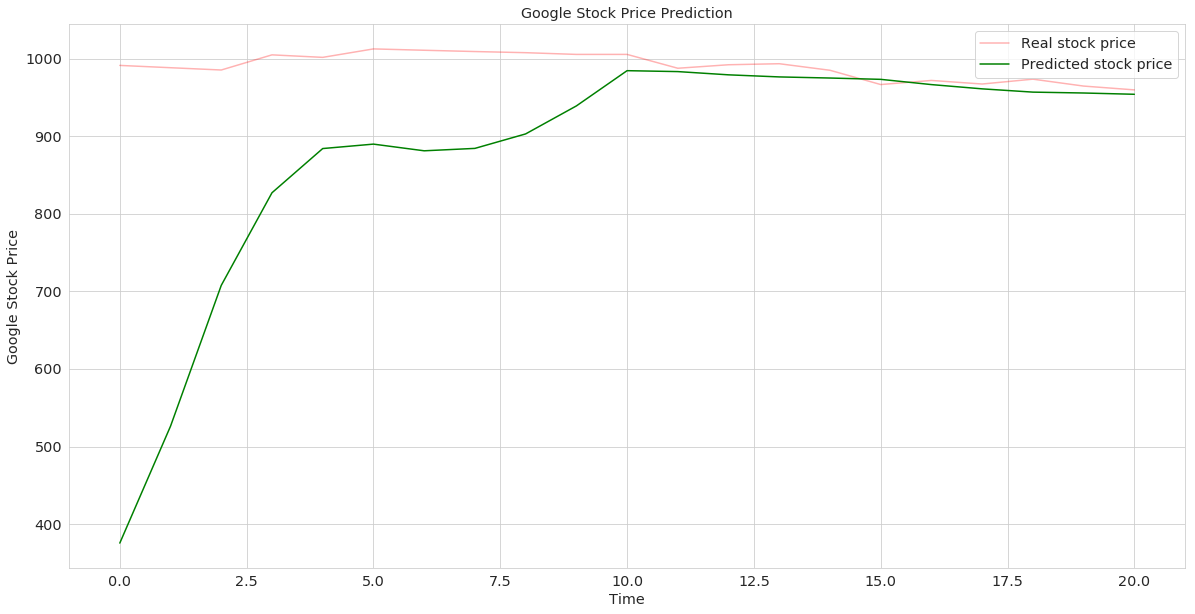

In [36]:
#plot the original and predicted google stock price
plt.plot(real_gstock_price,color='r',alpha=0.3,label='Real stock price')
plt.plot(predicted_gstock_price,color='g',label='Predicted stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()